In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [5]:
import cupy as cp
from cuml import UMAP

In [6]:
PROJECT_PATH = '../'
PCP_PATH = '/scratch/ceph/szalay/swei20/AE/PCP_HH.h5'
PCP20_PATH = '/scratch/ceph/szalay/swei20/AE/PCP_FLUX_HH20.h5'
NORM_PATH = "/scratch/ceph/szalay/swei20/AE/norm_flux_step4.h5"
sys.path.insert(0, PROJECT_PATH)

### Load data

In [7]:
with h5py.File(PCP20_PATH, 'r') as f:
    flux = f['flux'][()]
    para = f['para'][()]

In [8]:
df = pd.DataFrame(data=para, columns=["F","T","L","C","O"])

In [11]:
for i in range(20):
    df[f"p{i}"] = flux[:,i]

In [12]:
df

,F,T,L,C,O,p0,p1,p2,p3,p4,...,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19
0,-2.50,6500.0,1.0,-0.50,-0.25,1.128136,0.499648,0.036838,-0.196974,0.081386,...,-0.135200,-0.240935,-0.071858,-0.020589,0.027230,0.069586,-0.019903,-0.030446,0.003281,0.233724
1,-2.50,6500.0,1.0,-0.50,0.00,1.133586,0.506791,0.049035,-0.191706,0.077841,...,-0.139503,-0.240090,-0.073487,-0.021476,0.028476,0.073180,-0.020825,-0.033335,0.004206,0.233356
2,-2.50,6500.0,1.0,-0.50,0.25,1.141074,0.515897,0.065249,-0.184368,0.072868,...,-0.145595,-0.237960,-0.075526,-0.022875,0.030216,0.077724,-0.022391,-0.037493,0.005415,0.232405
3,-2.50,6500.0,1.0,-0.50,0.50,1.150952,0.528012,0.087168,-0.174479,0.066188,...,-0.153512,-0.235022,-0.078318,-0.024464,0.032376,0.083260,-0.024282,-0.042887,0.007152,0.231194
4,-2.50,6500.0,1.0,-0.25,-0.25,1.128211,0.499715,0.037395,-0.196888,0.081358,...,-0.140768,-0.239359,-0.073590,-0.019091,0.024381,0.070400,-0.020398,-0.030844,0.003080,0.234117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80437,0.75,30000.0,5.0,0.25,0.50,1.068700,-0.355313,0.059830,-0.221402,-0.021413,...,-0.190863,0.025391,0.189177,-0.114144,-0.064251,0.039590,-0.307710,0.015562,-0.066573,0.000568
80438,0.75,30000.0,5.0,0.50,-0.25,1.046908,-0.325783,0.036727,-0.228807,-0.047633,...,-0.128441,0.011566,0.163596,-0.124283,-0.035489,0.028922,-0.239494,0.034514,-0.031271,0.003913
80439,0.75,30000.0,5.0,0.50,0.00,1.051465,-0.330723,0.042487,-0.227484,-0.041839,...,-0.143018,0.015042,0.169225,-0.122860,-0.042253,0.031656,-0.261197,0.030963,-0.044928,0.003365
80440,0.75,30000.0,5.0,0.50,0.25,1.057335,-0.337842,0.050818,-0.225474,-0.033938,...,-0.164157,0.020401,0.176835,-0.120683,-0.051477,0.035457,-0.289490,0.024852,-0.061715,0.002480


In [27]:
umap_dim = 5
u = UMAP(n_neighbors=50, n_components=umap_dim)

In [33]:
uu = u.fit_transform(flux[:,:10])

In [34]:
for i in range(umap_dim):
    df[f"u{i}"] = uu[:,i]

In [35]:
import seaborn as sns

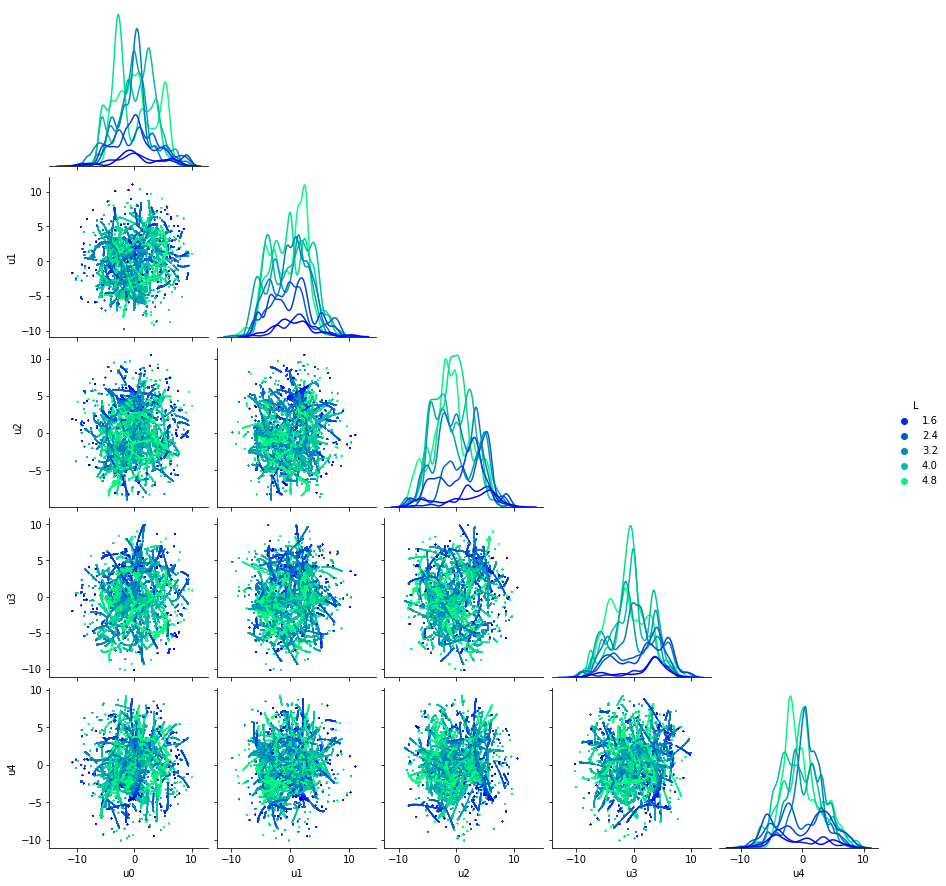

In [36]:
sns.pairplot(
    df,
    x_vars = [f"u{i}" for i in range(umap_dim)],
    y_vars = [f"u{i}" for i in range(umap_dim)],
    hue = "L",
    plot_kws=dict(marker="o", s=2, edgecolor="none"),
    diag_kws=dict(fill=False),
    palette="winter",
    corner=True
)

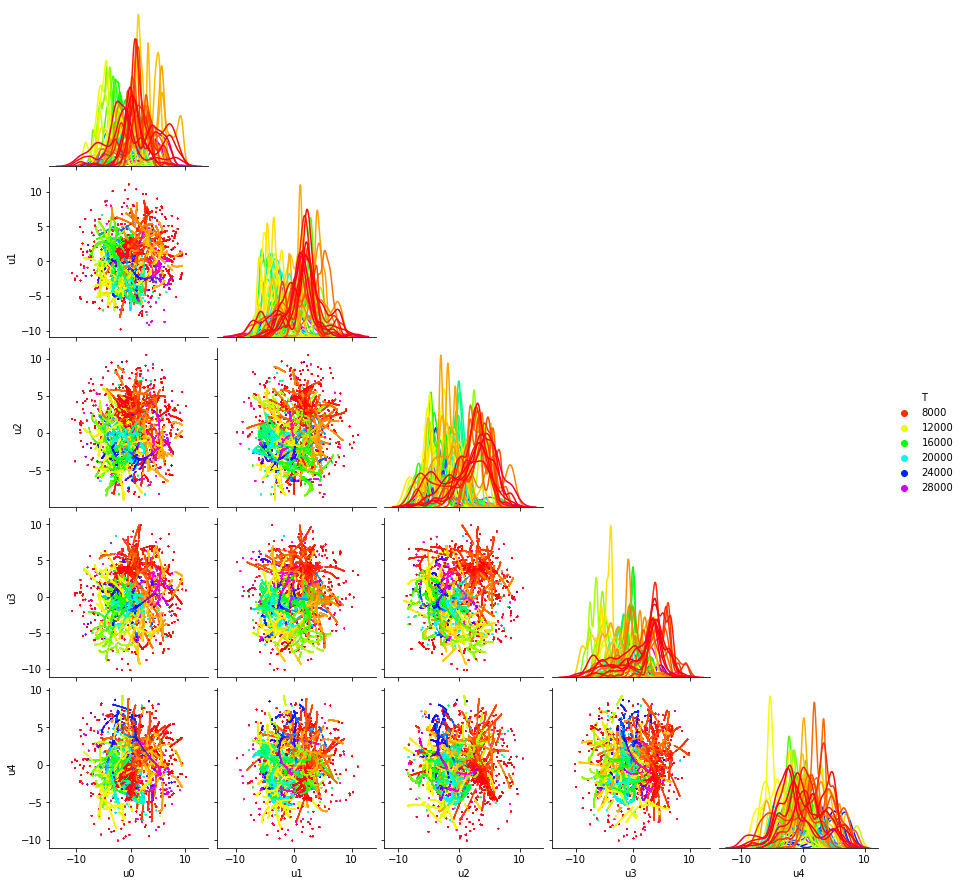

In [37]:
sns.pairplot(
    df,
    x_vars = [f"u{i}" for i in range(umap_dim)],
    y_vars = [f"u{i}" for i in range(umap_dim)],
    hue = "T",
    plot_kws=dict(marker="o", s=2, edgecolor="none"),
    diag_kws=dict(fill=False),
    palette="gist_rainbow",
    corner=True
)

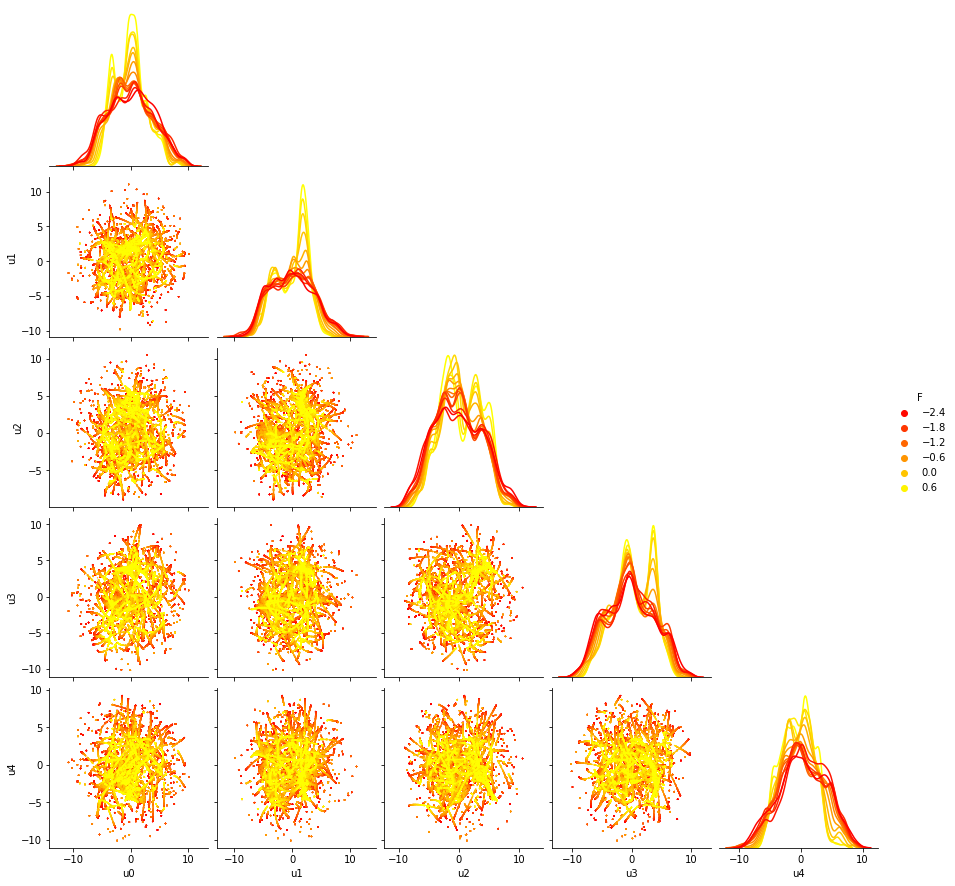

In [38]:
sns.pairplot(
    df,
    x_vars = [f"u{i}" for i in range(umap_dim)],
    y_vars = [f"u{i}" for i in range(umap_dim)],
    hue = "F",
    plot_kws=dict(marker="o", s=2, edgecolor="none"),
    diag_kws=dict(fill=False),
    palette="autumn",
    corner=True
)